**DS_C3_SC1 - PLATAFORMAS DE VISUALIZACIÓN**

---

**Reto: Explorando el índice de felicidad**

NOMBRE DEL PARTICIPANTE: Eduardo Murillo Munguia

1.	Genera una libreta en Google Colab para el reto, cuya estructura esté basada en los análisis solicitados.

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

2.	Descarga el archivo: happiness_report.csv y guarda, en un dataframe (`happiness`), todos sus registros.

In [3]:
happiness = pd.read_csv("/content/sample_data/happiness_report.csv")

3.	A partir del dataframe happiness obtén otro (`mexico`) donde sólo almacenes la información de México. Haz que la columna `Country or region` quede como índice. 

In [4]:
mexico = happiness[happiness['Country or region'] == 'Mexico'].set_index('Country or region')
mexico

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
Country or region,,,,,,,,
Mexico,23,6.595,1.07,1.323,0.861,0.433,0.074,0.073


4.	Obtén un histograma del puntaje (`score`) para identificar el rango o clase más frecuente. Ubica el valor de México con una etiqueta de texto. 

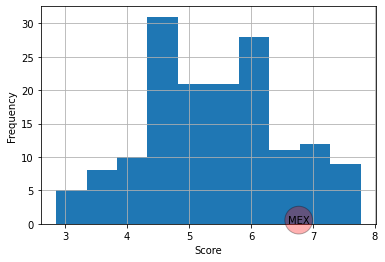

In [5]:
plt.hist(happiness['Score'], histtype = 'stepfilled')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.grid(visible=None)
props_bbox = {'boxstyle': 'circle',
'facecolor': 'red',
'alpha': 0.3}
plt.text(mexico.loc['Mexico', 'Score'],0.1,'MEX',bbox=props_bbox)
plt.show()

5.	Construye un box plot para la columna esperanza de vida (`Healthy life expectancy`). Ubica el valor de México con una anotación.

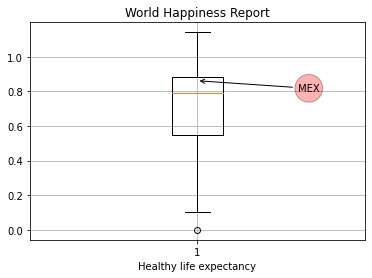

In [6]:
plt.boxplot(happiness['Healthy life expectancy'])
plt.grid(visible=None)
plt.title('World Happiness Report')
plt.xlabel('Healthy life expectancy')
plt.annotate('MEX', xy=(1, mexico.loc['Mexico', 'Healthy life expectancy']), xytext=(1.3, 0.8), 
            arrowprops=dict(facecolor='black', arrowstyle='->'),bbox=props_bbox)
plt.show()

6.	Crea una gráfico circular para analizar en qué medida los factores contribuyen a evaluar la felicidad en México. Para ello, deberás modificar la estructura del dataframe `mexico` obtenido anteriormente.

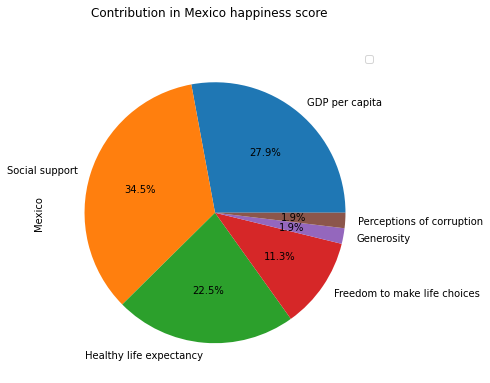

In [7]:
mexico_t = mexico.transpose()
mexico_t = mexico_t.drop(mexico_t.index[[0,1]])
mexico_t.plot.pie(subplots=True, labels=mexico_t.index,rotatelabels=False,autopct='%1.1f%%', figsize=(6,6), title='Contribution in Mexico happiness score')
plt.legend(labels=[])
plt.show()

# New Section

7.	Filtra el dataframe para quedarte con 5 países (el más feliz, el menos feliz, México y dos más de tu interés) y visualiza en una misma gráfica los 6 factores.

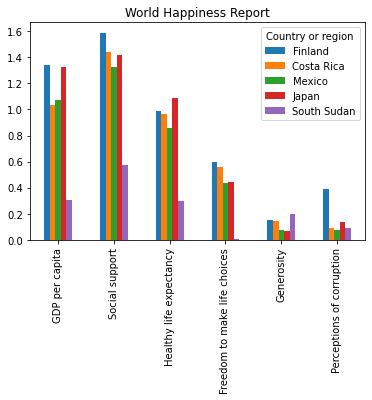

In [8]:
happiness_2  = happiness.loc[happiness['Country or region'].isin([happiness.iloc[0]['Country or region'], 'Mexico', 'Costa Rica', 'Japan', happiness.iloc[-1]['Country or region']])].set_index('Country or region')
happiness_2 = happiness_2.transpose()
happiness_2 = happiness_2.drop(happiness_2.index[[0,1]])
ax = happiness_2.plot.bar(title='World Happiness Report')
ax.grid(False)

8.	Crea una matriz de subgráficas de 2 x 3 con scatter plots del puntaje (`score`) versus los 6 factores para determinar qué factor influye más en la evaluación.

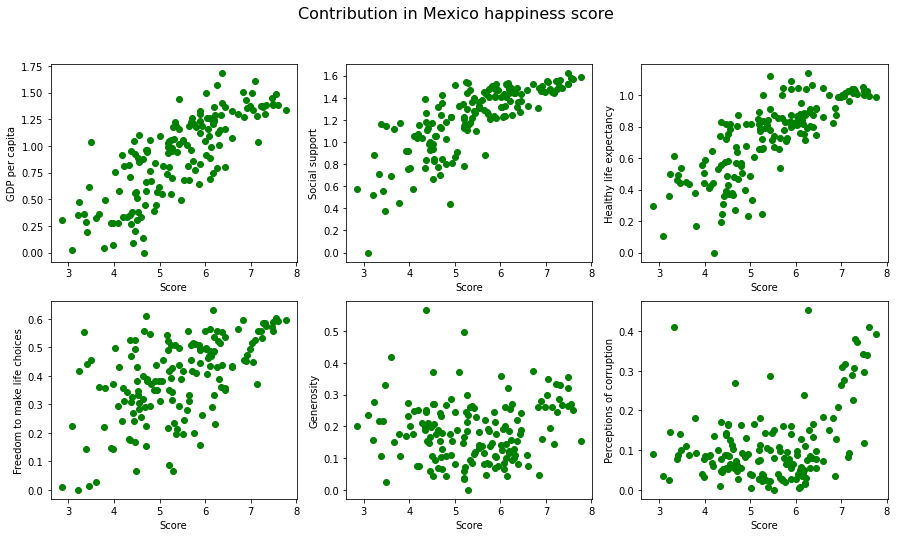

In [9]:
fig, axs = plt.subplots(2,3,figsize=(15,8)) 
fig.suptitle('Contribution in Mexico happiness score', fontsize=16)
axs[0,0].set_xlabel('Score')
axs[0,0].set_ylabel('GDP per capita')
axs[0,0].scatter(happiness['Score'], happiness['GDP per capita'], c='green')
axs[0,1].set_xlabel('Score')
axs[0,1].set_ylabel('Social support')
axs[0,1].scatter(happiness['Score'], happiness['Social support'], c='green')
axs[0,2].set_xlabel('Score')
axs[0,2].set_ylabel('Healthy life expectancy')
axs[0,2].scatter(happiness['Score'], happiness['Healthy life expectancy'], c='green')
axs[1,0].set_xlabel('Score')
axs[1,0].set_ylabel('Freedom to make life choices')
axs[1,0].scatter(happiness['Score'], happiness['Freedom to make life choices'], c='green')
axs[1,1].set_xlabel('Score')
axs[1,1].set_ylabel('Generosity')
axs[1,1].scatter(happiness['Score'], happiness['Generosity'], c='green')
axs[1,2].set_xlabel('Score')
axs[1,2].set_ylabel('Perceptions of corruption')
axs[1,2].scatter(happiness['Score'], happiness['Perceptions of corruption'], c='green')

plt.show()

9.	Comprueba lo anterior con un heatmap donde incluyas los índices de correlación.

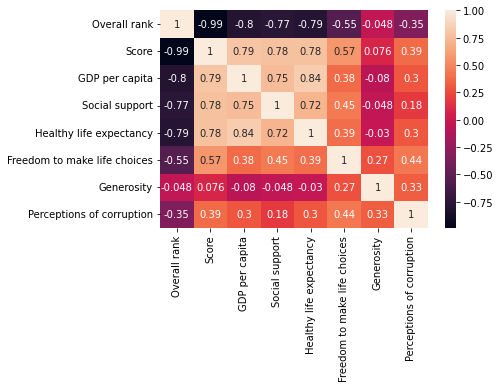

In [10]:
sns.heatmap(happiness.corr(), annot=True)
plt.show()

10.	Combina con el dataframe `metada` (Metadata.csv) para graficar la felicidad promedio por región. 

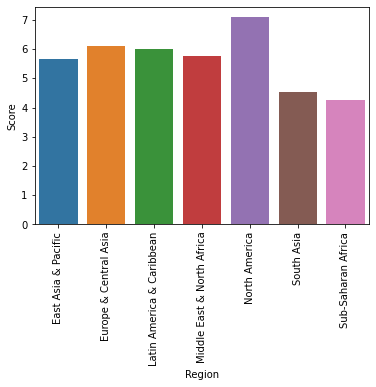

In [23]:
metadata = pd.read_csv('/content/sample_data/Metadata.csv')
happiness_merge = pd.merge(happiness, metadata, left_on='Country or region', right_on='TableName')
happiness_merge.dropna(subset=['Region'],inplace=True)
happiness_mean_region = happiness_merge.groupby('Region')['Score'].mean().reset_index()
sns.barplot(x='Region', y='Score', data=happiness_mean_region)
plt.xticks(rotation=90)
plt.show()